<h3>HW2</h3>
71133116
周琦雅

本次作業會藉由人物的影像檔以及手寫數字的影像檔來做SVD相關的應用練習，第一部份在比較不同的＂Rank q approximation＂的ｑ值，對於圖片壓縮後的清晰度會有什麼影響，並進一步比較將圖片以不同大小作切割後的效果，再搭配隨機產生的一百張手寫數字，進行不同壓縮倍率的比較。第二部分則是利用不同圖片SVD的U作為加密工具，再將影像解密回原本圖片，觀察解密後的圖片品質是否有所不同。

In [7]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<h3>習題1</h3>
比較下列幾種對於圖像矩陣 X 的重組安排，並進行 “Rank q approximation”，在同樣的壓縮比之下(達到壓縮的目的並保持圖像的品質)，觀察還原後的圖像品質哪個最好並能說出理由。

1. X 不變

2. 將 X 以 8 $\times$ 8 小圖（patch）進行切割，再將每個小圖拉成 64\times 1 的向量，最後重組這些向量並排成新的 64\times N 矩陣。

3. 同上，小圖大小為 16 $\times$ 16/per patch。

4. 同上，但分割成 32 $\times$ 32/per patch

In [8]:
imgfile = 'Lenna.png' # 512x512x3
X = mpimg.imread(imgfile) #array

if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale

N, p = X.shape #(512,512)

In [9]:
def reconstructed(X,num):
    img8 = np.zeros((num*num, (N*p)//(num*num)))
    for i in range(N//num):
        for j in range(p//num):
            block = X[i*num:(i+1)*num, j*num:(j+1)*num]
            img8[:, i*(N//num)+j:i*(N//num)+j+1] = block.reshape(num*num, 1)

    U, E, VT = svd(img8, full_matrices=False)
    q = np.array([p/4, p/16, p/64]).astype('int') 

    fig, ax = plt.subplots(1, 3, figsize=(12, 4)) 
    for k, r in enumerate(q):
        Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :]
        X_new = np.zeros((N,p))
        for i in range(N//num):
            for j in range(p//num):
                X_new[i*num:(i+1)*num, j*num:(j+1)*num] = Xq[:, i*(p//num)+j].reshape(num, num)
        ax[k].imshow(X_new, cmap = 'gray') 
        ax[k].set_title('Compression ratio: {}'.format(p/r/2)) 
        ax[k].set_xticks([])
        ax[k].set_yticks([])
    fig.suptitle("%d x %d"%(num,num))
    plt.show()

<h3>說明</h3>
輸入為原始圖片 X 和參數 num，表示將圖片切割成 numnum 塊。程式會先將圖片切割成 numnum 塊，將每個小塊拉成一個向量，再將所有向量橫向排列成一個矩陣 img8。<p>
接著使用 SVD 對 img8 進行分解，得到左奇異矩陣 U、奇異值向量 E 和右奇異矩陣 VT。然後選擇不同的壓縮比率，將 E 中較小的奇異值保留下來，其餘奇異值設為 0，重組近似矩陣 Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :]。最後根據圖片切割的方式，將 Xq 中的每一列重組成一個小塊，最終重構出壓縮後的圖片。程式會將不同壓縮比率下的圖片顯示出來，並顯示其壓縮比率。

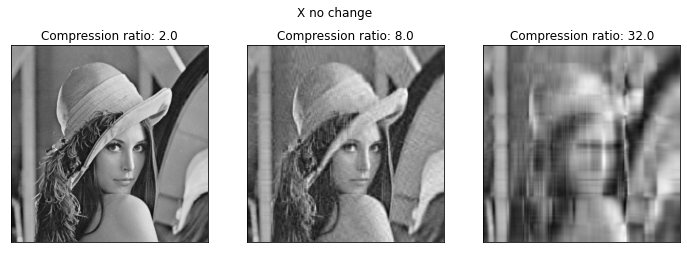

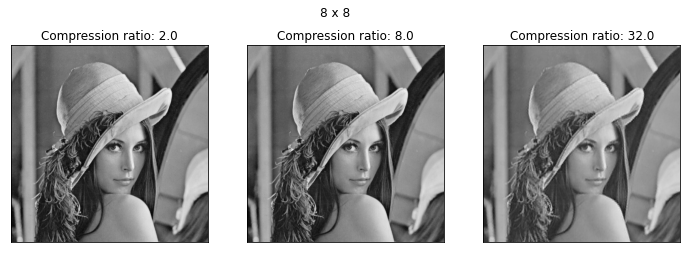

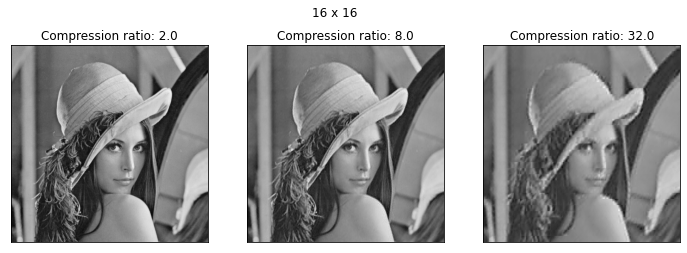

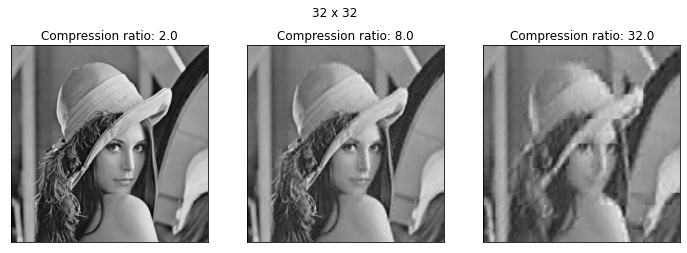

In [10]:
U, E, VT = svd(X, full_matrices=False)
k = 150
Ek = np.diag(E[:k])
Uk = U[:, :k]
Vtk = VT[:k, :]
img_reconstructed = np.dot(np.dot(Uk, Ek), Vtk)

q = np.array([p/4, p/16, p/64]).astype('int') 
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :]
    ax[i].imshow(Xq, cmap = 'gray')
    ax[i].set_title('Compression ratio: {}'.format(p/r/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
fig.suptitle("X no change")
plt.show()

reconstructed(X,num=8)
reconstructed(X,num=16)
reconstructed(X,num=32)

<h3>觀察結果</h3>

小圖像素數量更少的重組方式（即 8x8 per patch）可以更好地捕捉圖像的細節和局部細節，因為這些小塊更容易“看到”圖像的局部結構和細節。而像 32x32 per patch 這樣更大的小圖可能會導致信息的丟失和圖像細節的模糊。因此，在相同的壓縮比下，使用小塊重組的圖像品質可能更好。

<h3>習題2</h3>

以 70000 張手寫圖像為例，每個數字約 7000 字，寫一段程式碼來觀察這些手寫數字的影像與品質，且每次執行都能隨機觀看到不同的影像，。

In [11]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',parser='auto')

In [12]:
X, y = fetch_openml('mnist_784',return_X_y = True)
X = X.T # 配 合 本 文 對 於 圖 像 矩 陣 的 定 義 p x N

c:\Users\user\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [13]:
def montage(A, m, n):
    sz = np.sqrt(A.shape[0]).astype('int') # image size sz x sz
    M = np.zeros((m*sz, n*sz)) # montage image
    for i in range(m) :
        for j in range(n) :
            M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
                A[:, i*n+j].reshape(sz, sz)
    return M

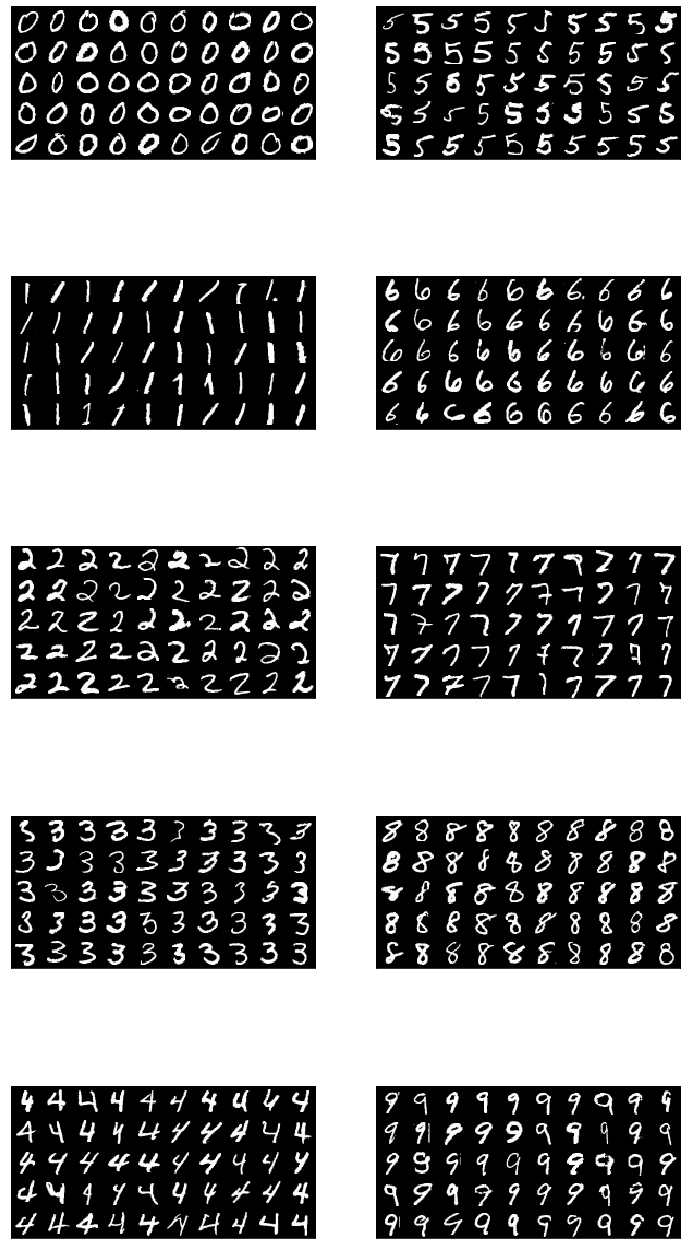

In [14]:
fig, ax = plt.subplots(5, 2, figsize=(12, 24)) 
for i in range(10):
    digit_to_show = ['0','1','2','3','4','5','6','7','8','9']
    idx = y[y==digit_to_show[i]].index
    Digit = X.iloc[:, idx[np.random.choice(np.arange(len(idx)), replace=False, size=(50))]]
    m, n = 5, 10 # A m x n montage (total mn images)
    M = montage(np.array(Digit), m, n)
    ax[i%5][i//5].imshow(M, cmap = 'gray', interpolation = 'nearest')
    ax[i%5][i//5].set_xticks([])
    ax[i%5][i//5].set_ｙticks([])
plt.show()

<h3>說明</h3>

從所有手寫數字圖像的數據框X中，選擇與當前數字相應的所有圖像，然後從中隨機選擇50張圖像，並將它們存儲在Digit中。iloc用於選擇特定的行和列。將創建的縮略圖顯示在ax的第i%5行和第i//5列上。

<H3>習題3</H3>

每張大小 28×28 的手寫數字圖像 70000 張，不經壓縮前的儲存空間為 54.88 M Bytes。若進行 SVD 的 “Rank q approximation”，則壓縮倍數由 q 決定。寫一支程式，當調整 q 值時，可以算出壓縮的倍數，並同時顯示原圖與壓縮後還原的圖各 100 張做為比較（任選 100 張）。另外 q 的選擇可以根據 $\sigma_1$, $\sigma_2$, $\cdots$,  $\sigma_r$ 的「能量配置」來決定，或說決定 q 之後，可以計算所採用的主成分的能量佔比，本題也可以順便列印出這個佔比。

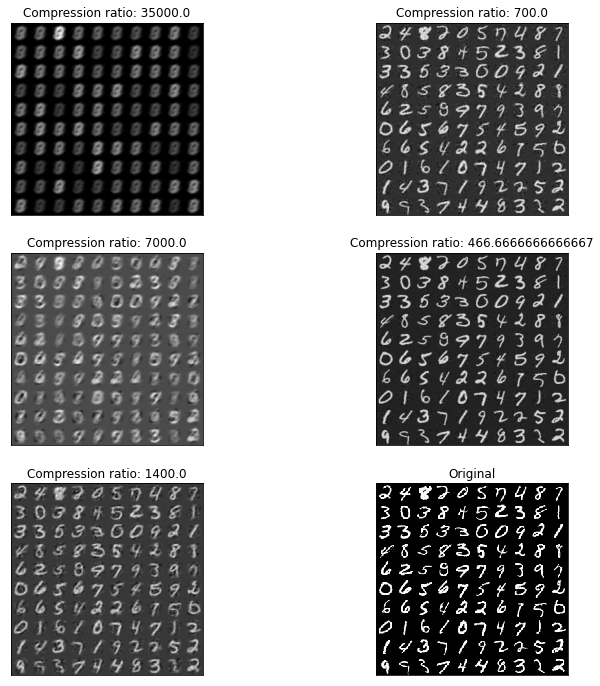

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
m, n = 10, 10  # m x n montage (total mn images)
X_random = X.iloc[:, np.random.choice(np.arange(len(X)), replace=False, size=(100))]
M = montage(np.array(X_random), m, n)

N, p = X.shape 
U, E, VT = svd(X_random,full_matrices = False )  # full_matrices = False (到 r) 
q = np.array([1, 5,25,50,75])
# q = 5
m, n = 10, 10
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :]
    MD=montage(Xq, m, n)
    ax[i%3][i//3].imshow(MD, cmap ='gray')
    ax[i%3][i//3].set_title('Compression ratio: {}'.format(p/r/2))
    ax[i%3][i//3].set_xticks([])
    ax[i%3][i//3].set_yticks([])
    
ax[2][1].imshow(M, cmap = 'gray', interpolation = 'nearest')
ax[2][1].set_title('Original')
plt.xticks([])
plt.yticks([])
plt.show()

<h3>說明</h3>

本題結合以上兩個習題的內容，目的是展示對 MNIST 數據集進行 SVD 壓縮的效果，其中包括了生成隨機 100 張圖像、展示 SVD 壓縮後的圖像、以及展示原始圖像與壓縮後圖像的比較。

<h3>觀察結果</h3>

當 q 值越大，即主成分的個數越多，所保留的原始資料也就越多，因此圖片質量會越好。反之，當 q 值越小，即主成分的個數越少，所保留的原始資料就越少，因此圖片質量會越差。

但是需要注意的是，在一定範圍內，圖片的壓縮比例和質量之間是一種權衡關係。因為當 q 值很大時，我們會得到高品質的圖像，但同時需要更多的存儲空間。當 q 值很小時，我們會得到更小的壓縮比例，但是圖像的品質會因此下降。因此，我們需要在圖片質量和存儲空間之間做一個權衡，找到最佳的 q 值。對於本題來說 q=50 是不錯的結果!!

<h3>習題7-1</h3>

有 5 張經過加密的影像圖，其加密的方式採 Yale Faces 38 人 2410 張人臉圖像矩陣 X 的 SVD，即 $ X = U \times  V^T $ ，取 U 作為影像加密的工具，即假設向量 x 代表一張原圖影像，則 U[:, 0:q]^T x 代表該影像的前 q 個主成分，以此作為加密影像。

請解密這 5 張影像。




In [19]:
import numpy as np
import scipy.io

D = scipy.io.loadmat('E:\\淺度機器學習\\data\\allFaces.mat')
X = D['faces'] # 32256 x 2410, each column represents an image
y = np.ndarray.flatten(D['nfaces']) #每位人臉的張數
#每張影像的大小與人數
m = int(D['m']) # 168
n = int(D['n']) # 192
n_persons = int(D['person']) # 38

In [20]:
from numpy.linalg import svd

avgFace = X.mean(axis=1).reshape(-1,1)
X_avg = X-np.tile(avgFace,(1,X.shape[1]))
U_fcae,E,VT = svd (X_avg,full_matrices = False)

In [22]:
import pandas as pd

im_path = "E:\\淺度機器學習\\data\\face_unknow.csv"
im_arr = pd.read_csv(im_path)
im_arr

No1         No2        No3         No4        No5
0    -120.815967 -127.083042 -89.081239 -111.389301 -86.646668
1     -32.165665  -26.291472 -33.597232  -16.608203 -29.260749
2      10.235471   20.068477  15.352341   23.262589  25.600336
3     -24.833294  -36.443247 -27.678550  -33.440434 -24.704453
4      -2.973631   -0.440829  -3.515939   -1.809990  -8.411470
...          ...         ...        ...         ...        ...
1995    0.118998    0.070061  -0.065590    0.090736  -0.046849
1996    0.093725    0.044825  -0.009170   -0.082271   0.229798
1997    0.052742    0.123789   0.001112   -0.032884   0.195135
1998    0.096722   -0.028503  -0.023043    0.094269   0.311638
1999    0.060044    0.102311   0.101351   -0.029229  -0.037006

[2000 rows x 5 columns]

$X_{q}=U_{q} U_{q}^{T} x$

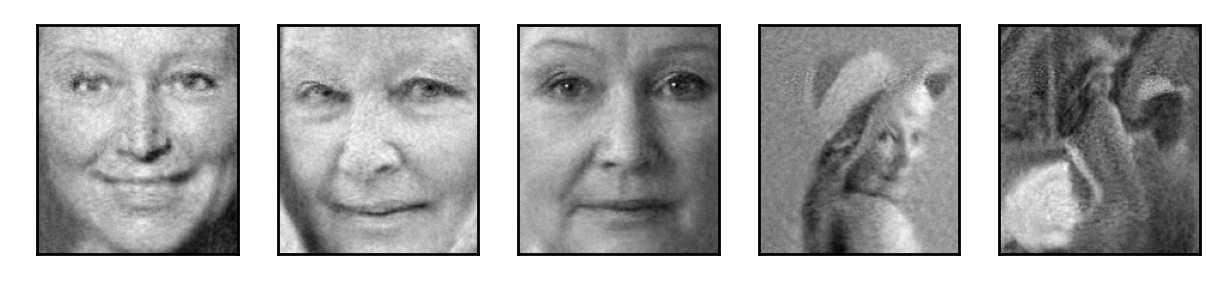

In [23]:
q=2000
Xq= np.dot(U_fcae[: ,0:q],im_arr)
Xq.shape
fig , ax =plt.subplots(1,5,dpi=250)
height, width = 168,192
for i in range (5):
    ax[i].imshow(Xq[:,i].reshape(height,width).T,cmap="gray")
    ax[i].set_xticks([]) 
    ax[i].set_yticks([])

<h3>說明</h3>

原始影像向量 $x$ 與U的前 $q$ 個主成分構成的矩陣 $U_q$ 相乘，得到一個 $q \times 1$的向量 $y=U_q^Tx$，這就是加密後的影像向量。

解密只需將加密過程中使用的加密鑰匙$U_q$與加密後的影像向量$y$相乘，即可得到還原後的影像向量$x'=U_qy$。這是因為，根據SVD分解的定理，$X=U\Sigma V^T$，其中$U$是一個正交矩陣，其前$q$個主成分構成的矩陣$U_q$也是一個正交矩陣，因此$U_q$的逆矩陣就是$U_q^T$，即$U_q^TU_q=I_q$，其中$I_q$為$q \times q$的單位矩陣。因此，$x'=U_qy=U_qU_q^Tx=I_qx=x$，即還原後的影像向量就是原始影像向量。


<h3>習題7-2</h3>

自行找 5 張照片（大小必須同 Yale Faces 的 192×168 或自行 Resize），含人臉、水果、風景 … 等進行加密後（q 自選），再解密，觀察這些解密後的影像的效果，是否人臉的表現比較好？其他非人臉影像，如風景影像，能透過由人臉建構的特徵 U 加密嗎？（即解密後能否看到原圖模樣？）

以Yale Faces 38 人 2410 張人臉圖像矩陣 X 的 SVD其中的U作為加密鑰匙

In [28]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 加密函数
def encrypt_image(im_path, q):
    im = Image.open("E:\\淺度機器學習\\data\\HW2圖片\\"+im_path)
    im = im.resize((192, 168))
    im = im.convert("L")
    im_arr = np.array(im)

    # 加密
    encrypted_image = np.dot(U_fcae[:,0:2000].T,im_arr.reshape(-1,1))
    return encrypted_image, U_fcae

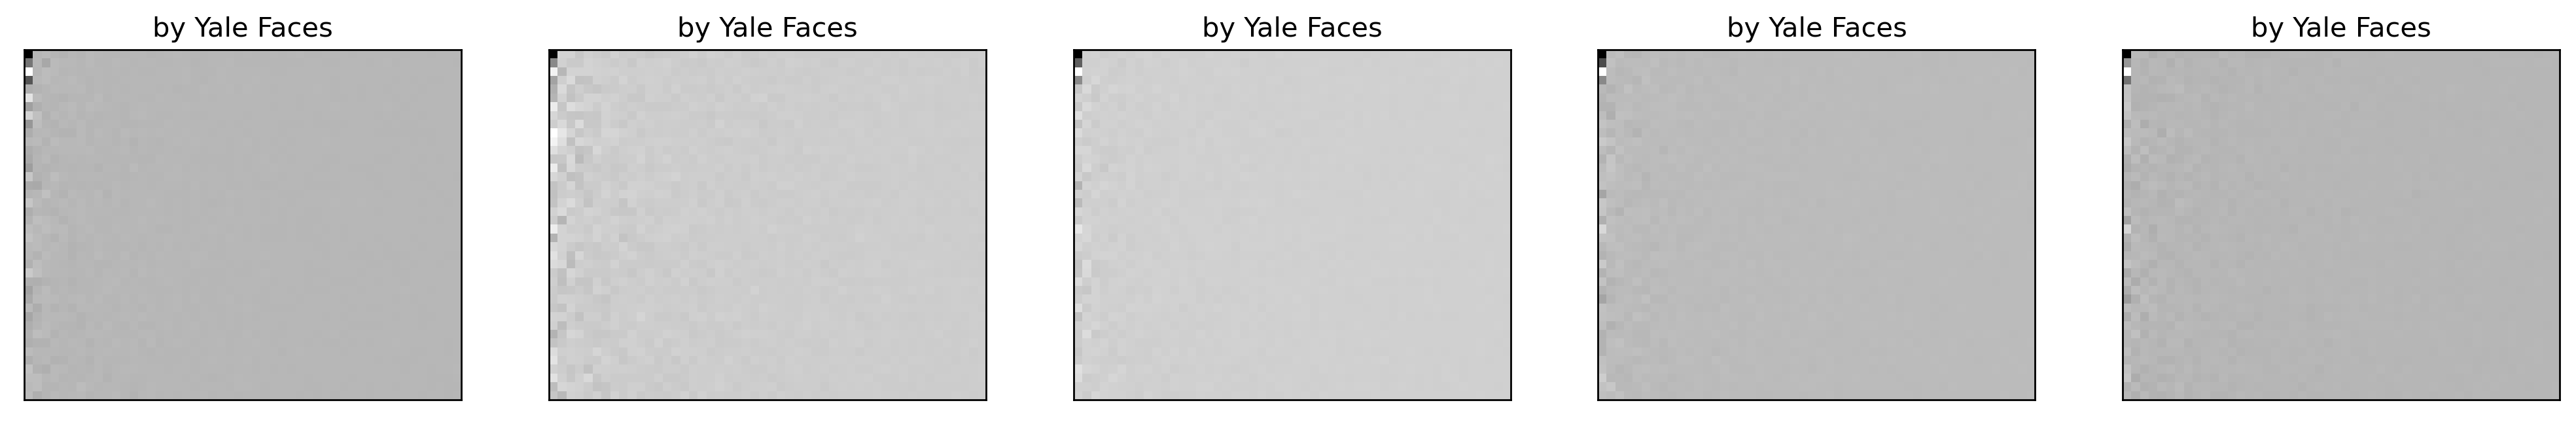

In [29]:
# 加密五張圖片
image_paths = ["apple.jpeg", "afghan_girl_small.jpg", "c.jpeg", "landscape.jpeg", "moai.jpeg"]  
q = 2000  
encrypted_images = []

fig , ax =plt.subplots(1,5,dpi=250)
fig.set_size_inches(20,20)

for i, im_path in enumerate(image_paths):
    encrypted_image, U_fcae = encrypt_image(im_path, q)
    ax[i].imshow(encrypted_image.reshape(50,40).T,cmap="gray")
    encrypted_images.append(encrypted_image)
    ax[i].set_xticks([]) 
    ax[i].set_yticks([])
    ax[i].set_title("by Yale Faces")


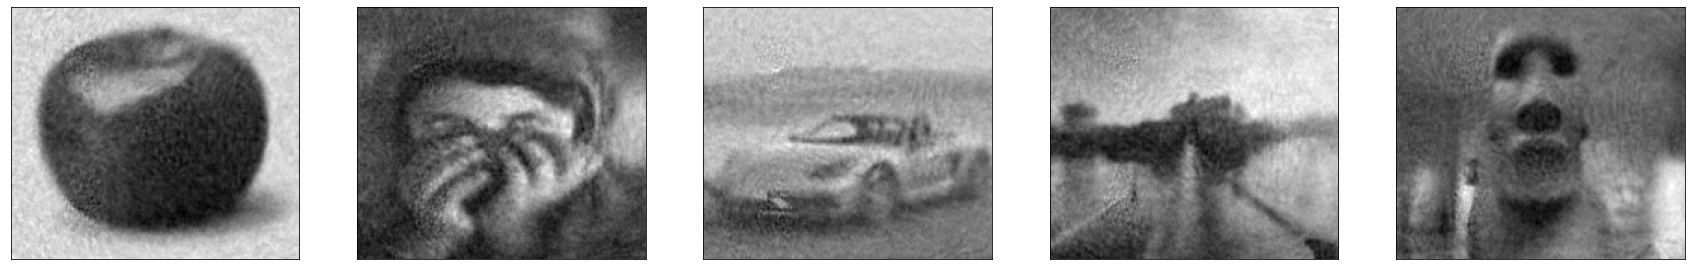

In [30]:
#解密
plt.figure(figsize=(30,50))
for i, encrypted_image in enumerate(encrypted_images):
    reconstructed_im = np.dot(U_fcae[:,0:2000],encrypted_image)
    plt.subplot(1, 5, i+1)
    plt.imshow(reconstructed_im.reshape(168,192),cmap="gray")
    plt.xticks([])
    plt.yticks([])

以其他五張圖像矩陣 X 的 SVD其中的U作為加密鑰匙

In [31]:
image_paths = [ "apple.jpeg" , "afghan_girl_small.jpg", "c.jpeg", "landscape.jpeg", "moai.jpeg"]  
#q = [100,250,500,1000,2000]  
encrypted_images = []
U_matrices = []
im_arrs=[]

for i ,im in enumerate(image_paths):
    im = Image.open("E:\\淺度機器學習\\data\\HW2圖片\\"+im)
    im = im.resize((192, 168))
    im = im.convert("L")
    im_arr = np.array(im)
    im_arrs.append(im_arr)
    U,E,VT = svd (im_arr,full_matrices = False)
    U_matrices.append(U)


Text(0.5, 0.98, 'Encrypted Image')

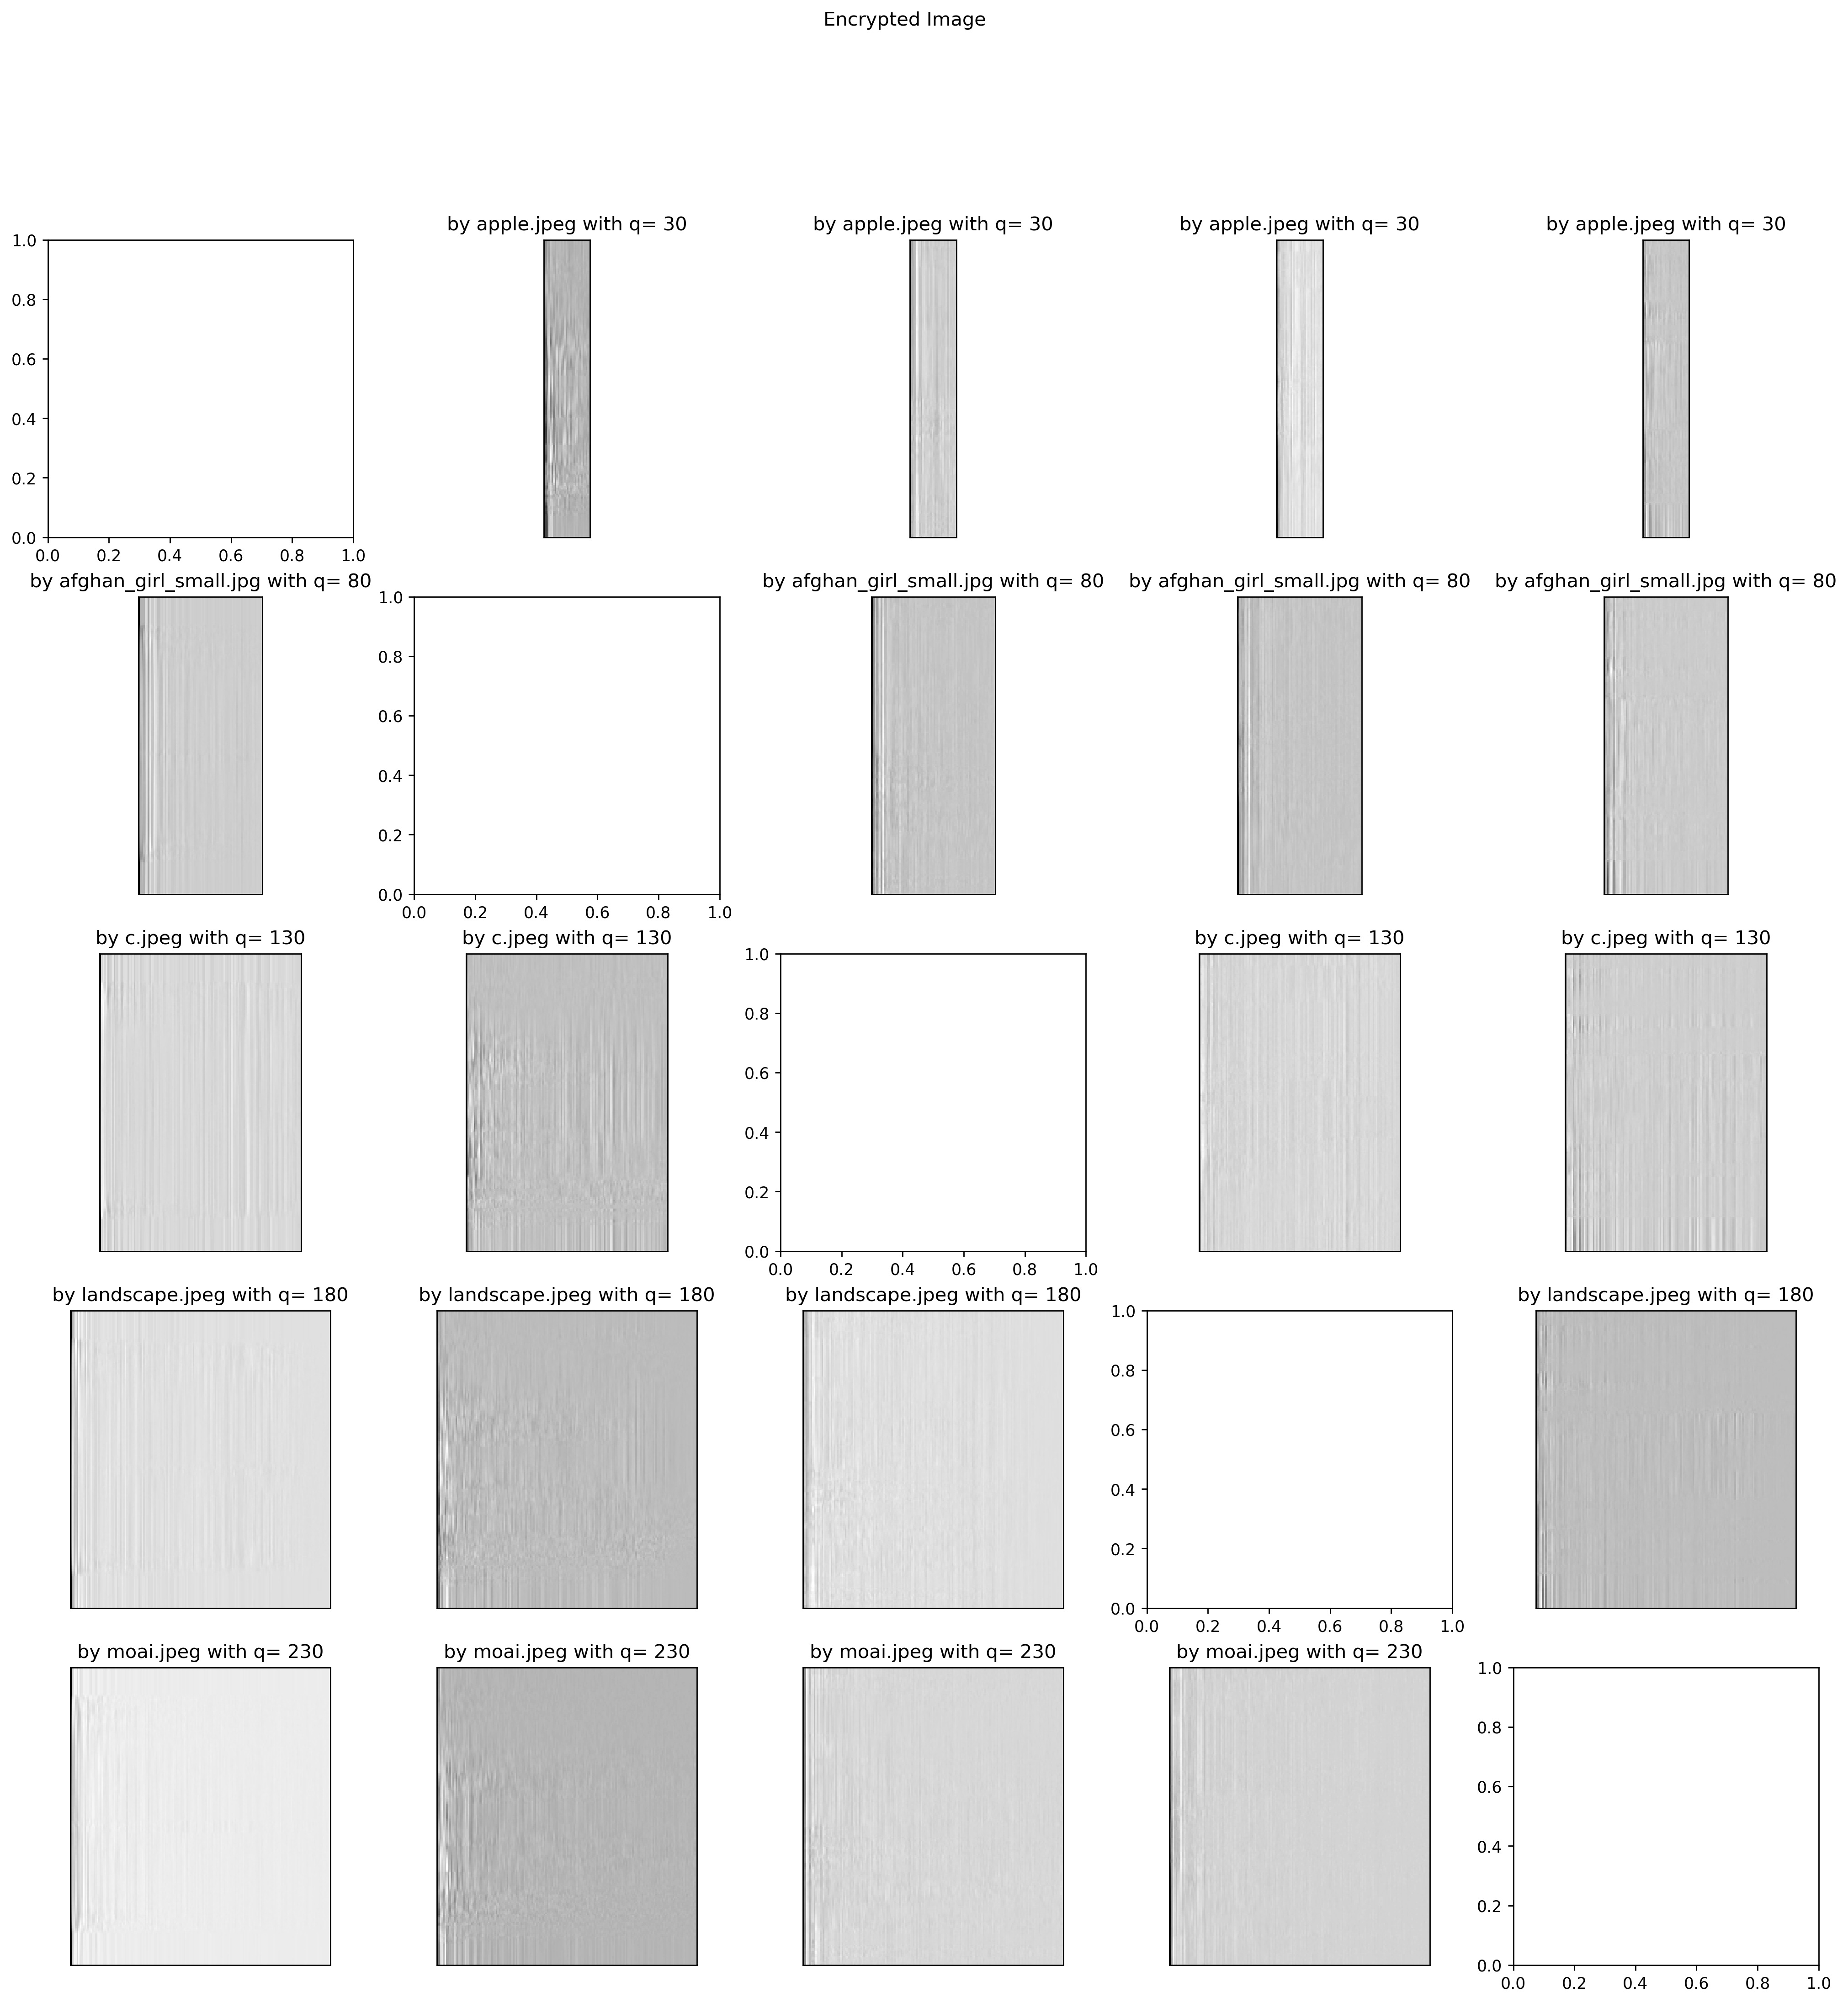

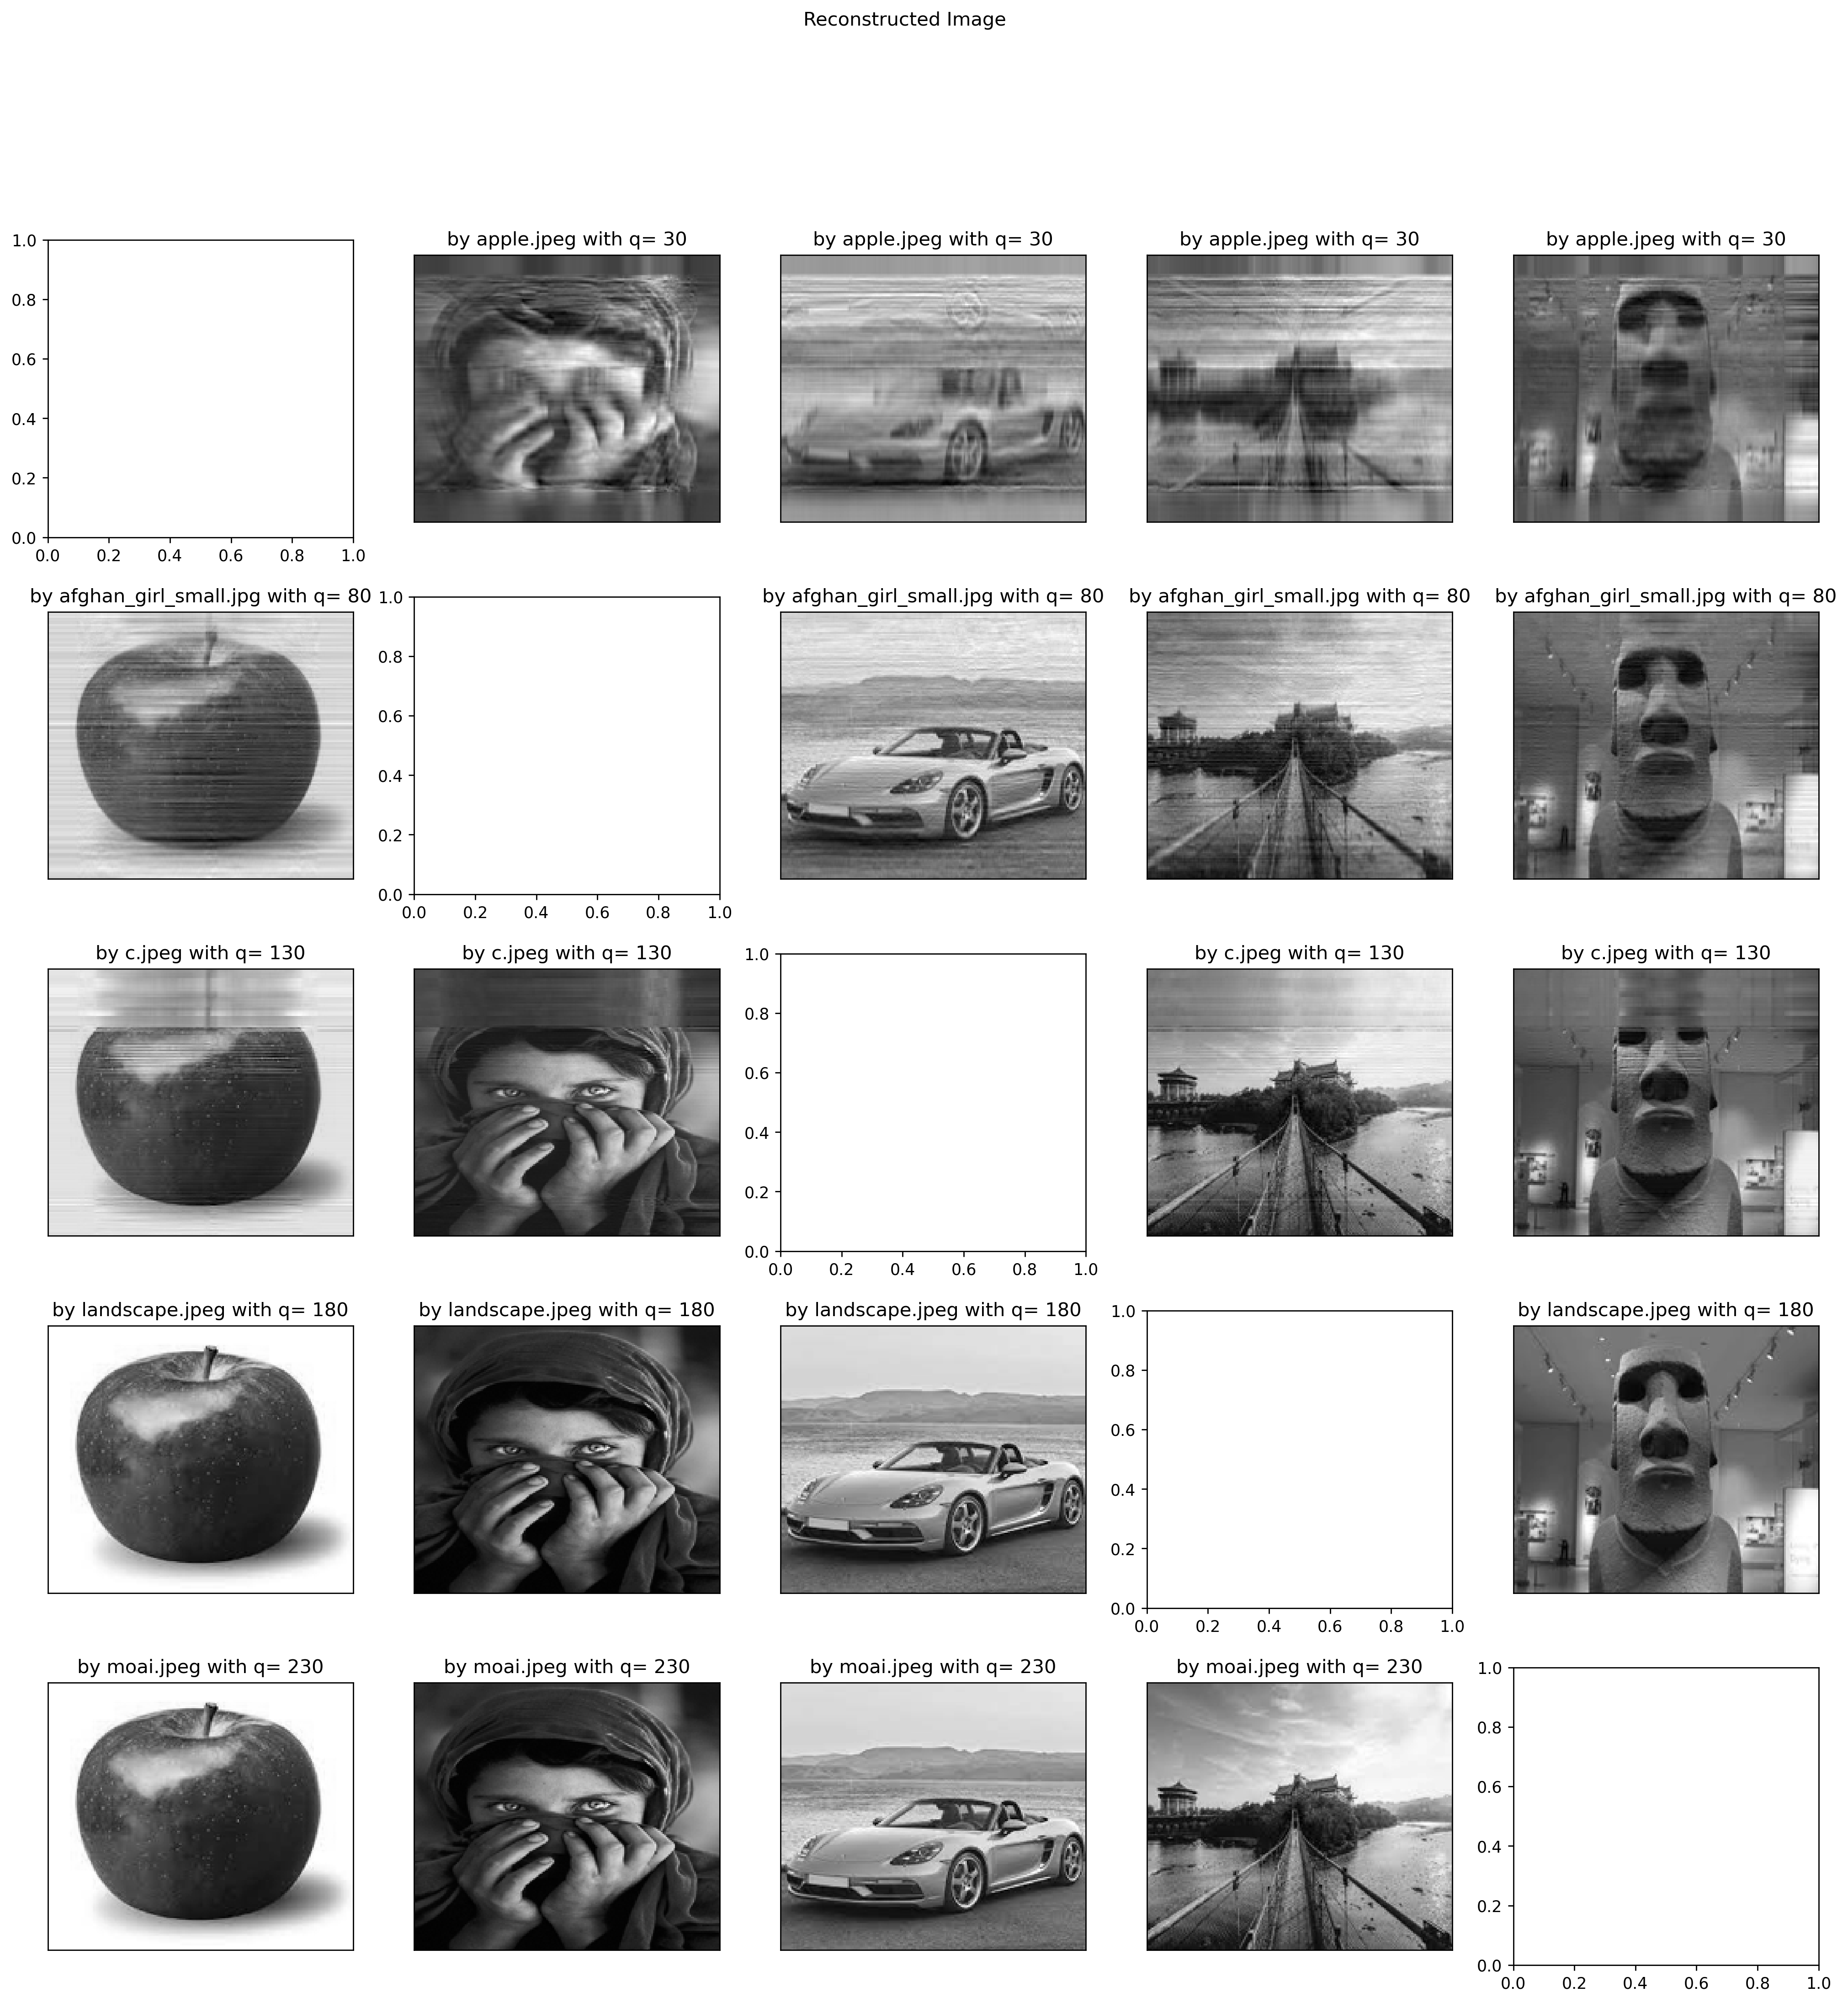

In [37]:
fig , ax =plt.subplots(5,5,dpi=250)
fig2 , ax2 =plt.subplots(5,5,dpi=250)
fig.set_size_inches(20,20)
fig2.set_size_inches(20,20)
q=30
for i, im_name in enumerate(image_paths): 
    for j,im_path in enumerate(image_paths):
        if im_path != im_name :
            #------加密------
            encrypted_image = np.dot(U_matrices[i][:,0:q].T,im_arrs[j])
            ax[i][j].imshow(encrypted_image.T,cmap="gray")
            encrypted_images.append(encrypted_image)
            ax[i][j].set_xticks([]) 
            ax[i][j].set_yticks([])
            ax[i][j].set_title("by "+im_name+ " with q= %d"%q)
            #-------解密-------
            reconstructed_im = np.dot(U_matrices[i][:,0:q],encrypted_image)
            ax2[i][j].imshow(reconstructed_im,cmap="gray")
            ax2[i][j].set_xticks([]) 
            ax2[i][j].set_yticks([])
            ax2[i][j].set_title("by "+im_name+ " with q= %d"%q)
    q+=50
fig2.suptitle("Reconstructed Image")
fig.suptitle("Encrypted Image")

<h3>說明</h3>

在加密時，選擇一張圖像的U矩陣的前q個主成分，使用這些主成分對另一張圖像的矩陣進行轉換得到加密後的矩陣。在解密時，使用原始圖像的U矩陣的前2000個主成分對加密後的矩陣進行轉換，得到解密後的矩陣。最後，將加密後的圖像和解密後的圖像顯示出來，可以觀察到加密後的圖像已經不太清晰，解密後的圖像與原始圖像也有一些差異。

<h3>觀察結果</h3>

從結果來看，使用人臉數據集的主成分來加密人臉影像，能夠得到較好的解密效果，即解密後的人臉影像比較接近原始影像。然而，對於其他非人臉影像，例如水果、風景、車和石像，解密後的影像的效果就不太好了，並不能很好地還原原始影像，因為這些影像的特徵和人臉影像不同，主成分也可能不同。因此，我們可以得出結論，使用 Yale Faces 數據集的主成分加密影像對於人臉影像是有效的，但對於其他類型的影像可能不太適用。